# Target variable : Diabetes

#### In this task we have to predict that whether the patient has diabetes or not

Importing various libraires

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn import metrics
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
d = pd.read_csv('./Downloads/diabetes.csv')

In [3]:
d.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
d.shape

(768, 9)

In [5]:
d.isnull().sum()

pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64

In [6]:
d.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From above we can deduce that :-

* Dataset have 768 rows and 9 columns in it
* There are no null values present in the dataset
* From describe we get to know the mean, standard deviation, etc of the columns which have numerical datatype in dataset.

#### Now lets begin the EDA

1. pregnancies

In [7]:
d['pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

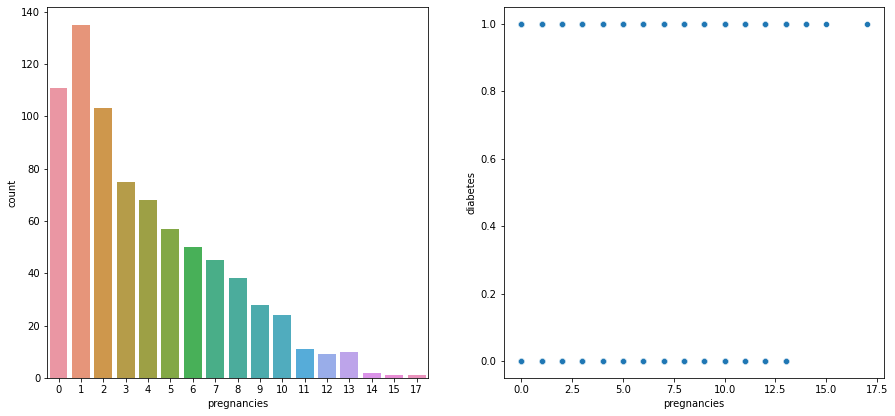

In [8]:
plt.figure(figsize= [15, 15])
plt.subplot(221)
sns.countplot(d['pregnancies'])
plt.subplot(222)
sns.scatterplot(x= 'pregnancies', y= 'diabetes', data= d)
plt.show()

From above we can deduce that most of patients are present in 1 number of pregnanices category from countplot and from scatterplot we observe that patients having above 13 number of pregnancies are diabetic.

2. glucose

In [9]:
d['glucose'].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190], dtype=int64)

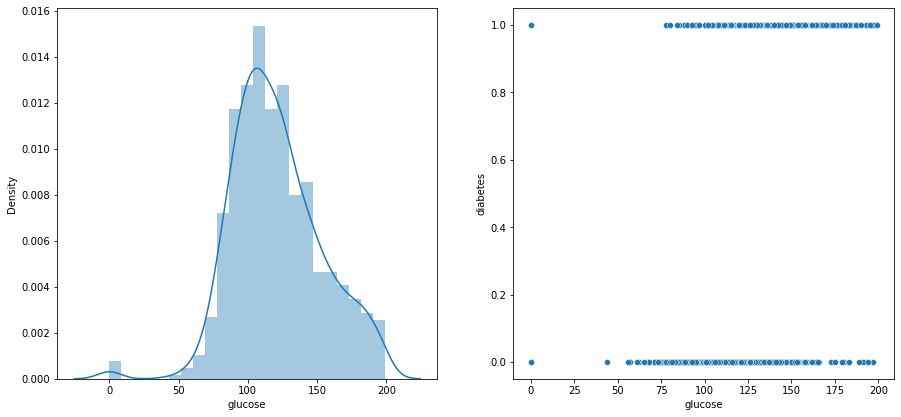

In [10]:
plt.figure(figsize= [15, 15])
plt.subplot(221)
sns.distplot(d['glucose'])
plt.subplot(222)
sns.scatterplot(x= 'glucose', y= 'diabetes', data= d)
plt.show()

From above we can deduce that data of glucose is negatively skewed with having highest density at around 110 from distplot and from scatterplot that glucose below 75 have no diabetes except the patients with 0 glucose which has both categories with them of diabetes.

3. diastolic

In [11]:
d['diastolic'].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114], dtype=int64)

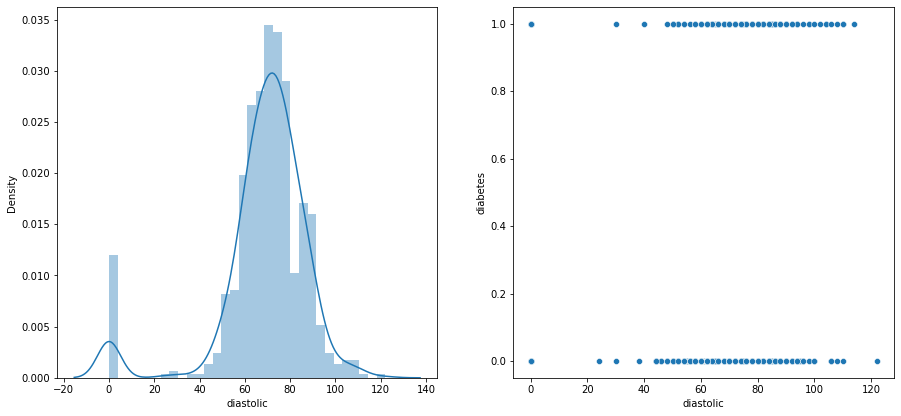

In [12]:
plt.figure(figsize= [15, 15])
plt.subplot(221)
sns.distplot(d['diastolic'])
plt.subplot(222)
sns.scatterplot(x= 'diastolic', y= 'diabetes', data= d)
plt.show()

From above we can deduce that data of diastolic is negatively skewed with having highest density at around 70 from distplot and from scatterplot we can deduce that patients having diastolic above 120 are not diabetic.

4. triceps

In [13]:
d['triceps'].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99],
      dtype=int64)

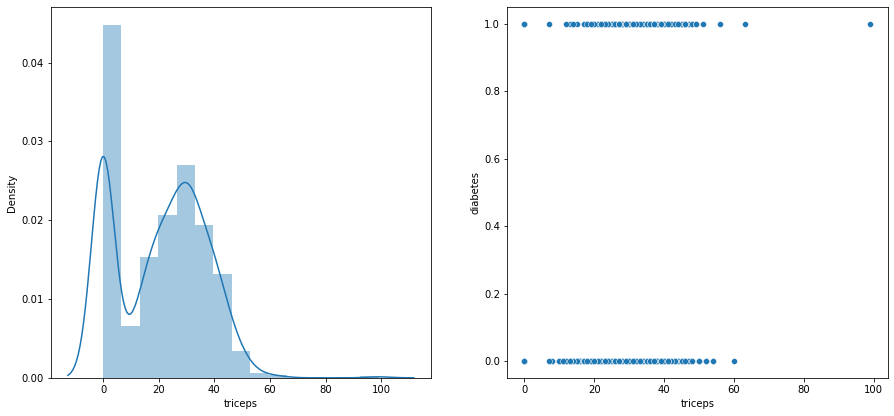

In [14]:
plt.figure(figsize= [15, 15])
plt.subplot(221)
sns.distplot(d['triceps'])
plt.subplot(222)
sns.scatterplot(x= 'triceps', y= 'diabetes', data= d)
plt.show()

From above we can deduce that data is positively skewed with having 2 peaks and having highest density at around 0 from distplot and from scatterplot we observe that patients having triceps above 60 have diabetes in only category 1.

5. insulin

In [15]:
d['insulin'].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

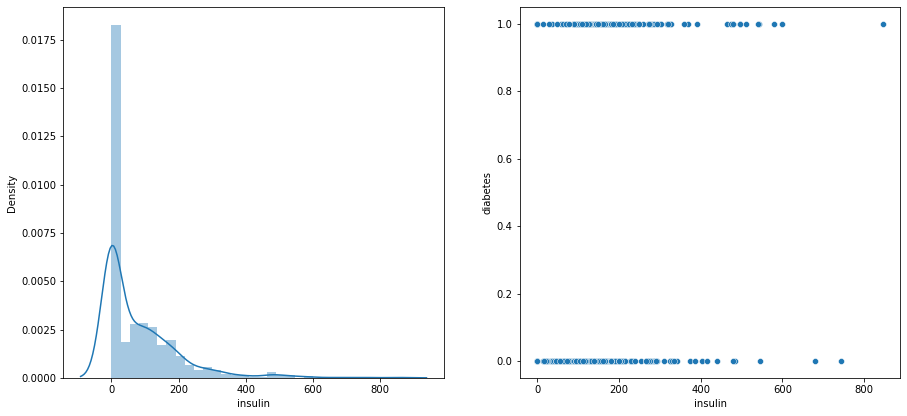

In [16]:
plt.figure(figsize= [15, 15])
plt.subplot(221)
sns.distplot(d['insulin'])
plt.subplot(222)
sns.scatterplot(x= 'insulin', y= 'diabetes', data= d)
plt.show()

From above we can deduce that data of insulin is positively skewed with having highest denstiy at around 0 from distplot and from scatterplot that patients with insulin level below 650 are present in both categories of diabetes and patients between insulin level range from 650 and 800 are present in category 0 of diabetes and patient having insulin level above 800 are present in category 1 of diabetes.

6. bmi 

In [17]:
d['bmi'].unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

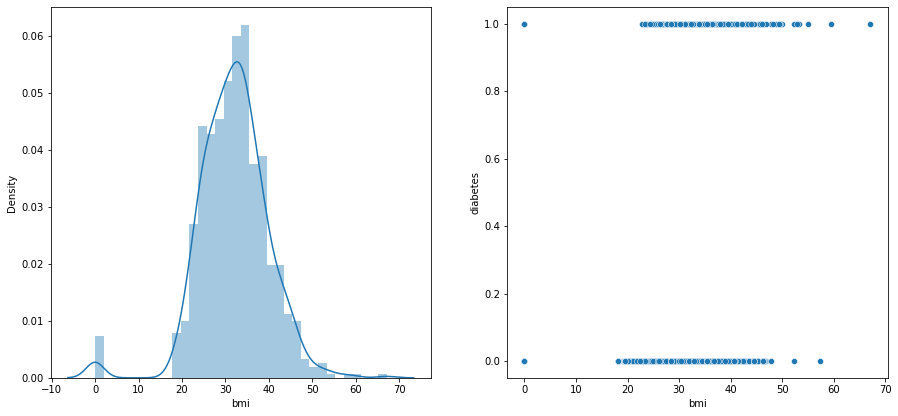

In [18]:
plt.figure(figsize= [15, 15])
plt.subplot(221)
sns.distplot(d['bmi'])
plt.subplot(222)
sns.scatterplot(x= 'bmi', y= 'diabetes', data= d)
plt.show()

From above we can deduce that data of bmi is some what positively skewed with having highest density at around 35 from distplot and from scatterplot that patients having bmi range between 25 and 60 are present in both categories of diabetes where as patients having below 25 bmi are present in category 0 of diabetes except for patients having 0 bmi are present in both categories of diabetes and patients having bmi above then 60 are present in category 1 of diabetes.

7. dpf

In [19]:
d['dpf'].unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

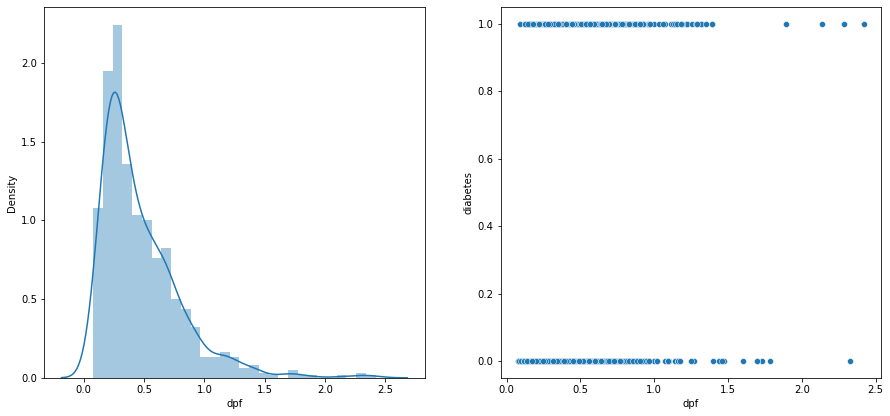

In [20]:
plt.figure(figsize= [15, 15])
plt.subplot(221)
sns.distplot(d['dpf'])
plt.subplot(222)
sns.scatterplot(x= 'dpf', y= 'diabetes', data= d)
plt.show()

From above we can deduce that data of dpf is positively skewed with having highest density at around 0.25 from distplot and from scatterplot patient having dpf level below 2.0 are present in both categories and patients having dpf level above 2.0 are present in only category 1 except for 1 patient who is present in category 0 of diabetes.

8. age

In [21]:
d['age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

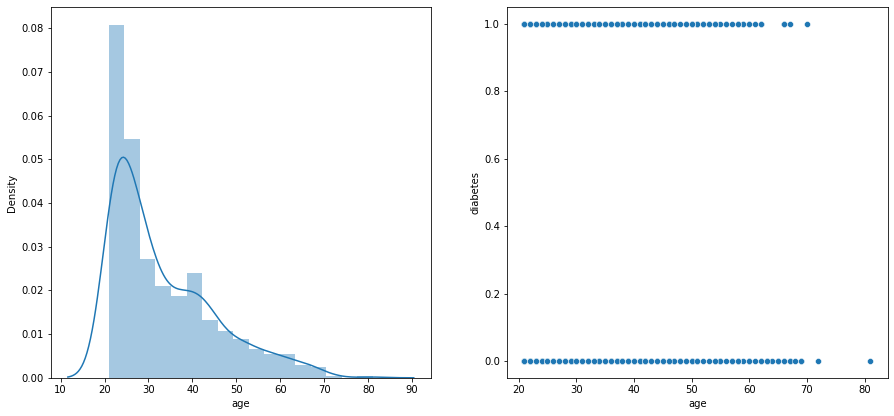

In [22]:
plt.figure(figsize= [15, 15])
plt.subplot(221)
sns.distplot(d['age'])
plt.subplot(222)
sns.scatterplot(x= 'age', y= 'diabetes', data= d)
plt.show()

From above we can deduce that data of age is positively skewed with having highest density at around 20 from distplot and from scatterplot we observe that patients below the age of 75 are present in both categories of diabetes and patients above the age of 75 are prensent in category 0 of diabetes.

#### Now checking datatypes of every column in dataset

In [23]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


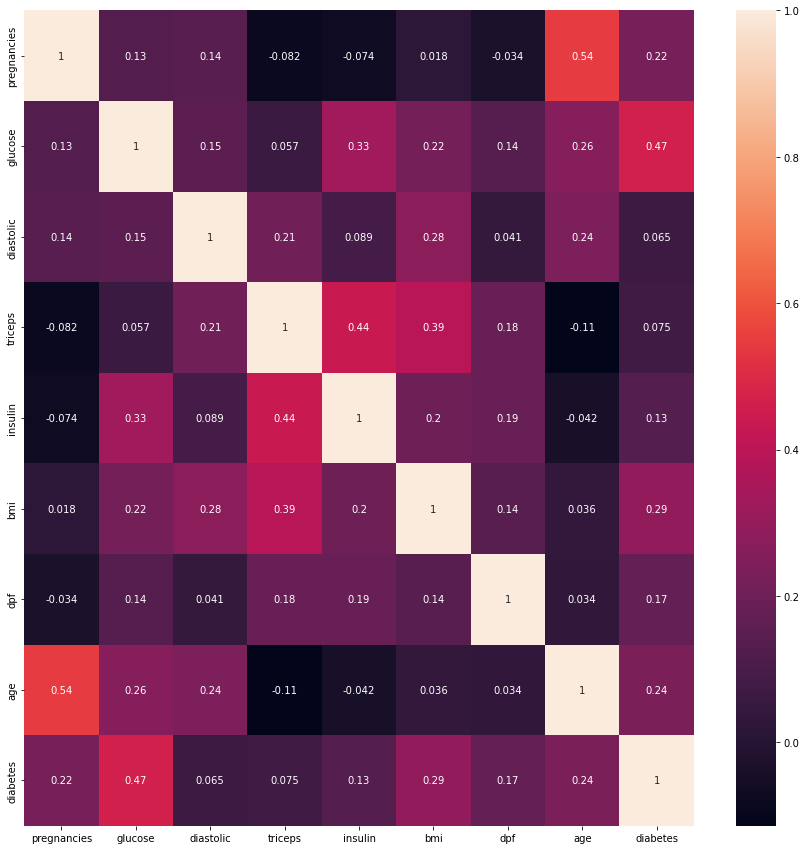

In [24]:
plt.figure(figsize= [15, 15])
sns.heatmap(d.corr(), annot= True)
plt.show()

As we can see that diastolic is having low positive correlation with target variable (diabetes) but having high correlation with other variables, so, we can drop it to reduce the data inter collinearity.

In [25]:
h = d.drop(['diastolic'], axis= 1)
h.head()

,pregnancies,glucose,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,35,0,33.6,0.627,50,1
1,1,85,29,0,26.6,0.351,31,0
2,8,183,0,0,23.3,0.672,32,1
3,1,89,23,94,28.1,0.167,21,0
4,0,137,35,168,43.1,2.288,33,1


#### Splitting The data

In [26]:
x = h.drop(['diabetes'], axis= 1)
y = h['diabetes']

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.25, random_state= 123)

In [28]:
scaler = StandardScaler()

In [29]:
xtrainscaled = scaler.fit_transform(xtrain)
xtestscaled = scaler.transform(xtest)

#### Applying GridSearchCV

1. LogisticRegression

In [30]:
lr = LogisticRegression()

In [31]:
lrf = GridSearchCV(lr, param_grid= {'C': [1,2,3,4,5]}, scoring= 'accuracy', cv= 5)

In [32]:
lrf.fit(xtrainscaled, ytrain)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5]}, scoring='accuracy')

In [33]:
lrf.score(xtrainscaled, ytrain)

0.78125

In [34]:
lrf.best_params_

{'C': 5}

2. DecisionTree

In [35]:
dt = DecisionTreeClassifier(criterion= 'entropy')

In [36]:
dtf = GridSearchCV(dt, param_grid= {'max_depth': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5]},
                   scoring= 'accuracy', cv= 5)

In [37]:
dtf.fit(xtrainscaled, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [38]:
dtf.score(xtrainscaled, ytrain)

0.8072916666666666

In [39]:
dtf.best_params_

{'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}

3. RandomForrest

In [40]:
rf = RandomForestClassifier(criterion= 'entropy')

In [41]:
rff = GridSearchCV(rf, param_grid= {'max_depth': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5]},
                   scoring= 'accuracy', cv= 5)

In [42]:
rff.fit(xtrainscaled, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [43]:
rff.score(xtrainscaled, ytrain)

0.8194444444444444

In [44]:
rff.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 3}

4. Bagging

In [45]:
bc = BaggingClassifier(base_estimator= DecisionTreeClassifier('entropy'))

In [46]:
bcf = GridSearchCV(bc, param_grid= {'n_estimators': [10,20,30,40,50], 'max_samples': [1,2,3,4,5], 'max_features': [1,2,3,4,5]},
                   scoring= 'accuracy', cv= 5)

In [47]:
bcf.fit(xtrainscaled, ytrain)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy')),
             param_grid={'max_features': [1, 2, 3, 4, 5],
                         'max_samples': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [48]:
bcf.score(xtrainscaled, ytrain)

0.6979166666666666

In [49]:
bcf.best_params_

{'max_features': 5, 'max_samples': 5, 'n_estimators': 50}

5. Support Vector

In [50]:
sv = SVC()

In [51]:
svf = GridSearchCV(sv, param_grid= {'C': [1,2,3,4,5], 'kernel': ['rbf', 'linear']}, scoring= 'accuracy', cv= 5)

In [52]:
svf.fit(xtrainscaled, ytrain)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5], 'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [53]:
svf.score(xtrainscaled, ytrain)

0.7604166666666666

In [54]:
svf.best_params_

{'C': 3, 'kernel': 'linear'}

#### Out of all the algorithms the RandomForrest is giving the best result for this dataset

In [55]:
rf = RandomForestClassifier(criterion= 'entropy', max_depth= 4, min_samples_leaf= 5, min_samples_split= 3)

In [56]:
pred = rf.fit(xtrainscaled, ytrain).predict(xtestscaled)

In [57]:
df = pd.DataFrame({'Actual': ytest, 'Prediction': pred})
df.head()

,Actual,Prediction
236,1,1
395,0,0
36,0,1
210,0,0
483,0,0


#### Now checking the algorithms effictiveness by applying various metrices

In [58]:
print('Accuracy score : ', metrics.accuracy_score(ytest, pred))

Accuracy score :  0.7760416666666666


In [59]:
print('Confusion matrix : ')
metrics.confusion_matrix(ytest, pred)

Confusion matrix : 


array([[106,  13],
       [ 30,  43]], dtype=int64)

In [60]:
print('cohen kappa score : ')
metrics.cohen_kappa_score(ytest, pred)

cohen kappa score : 


0.5024108003857282

In [61]:
print('precision score : ')
metrics.precision_score(ytest, pred)

precision score : 


0.7678571428571429

In [62]:
print('recall score : ')
metrics.recall_score(ytest, pred)

recall score : 


0.589041095890411

#### From above we can see that the algorithm is giving satisfactory score through various metrices. Now saving the algorithm model

In [63]:
mo = pickle.dumps(rf)

#### The task hasbeen completed